In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
np.random.seed(42)

#### Sample from Gaussian

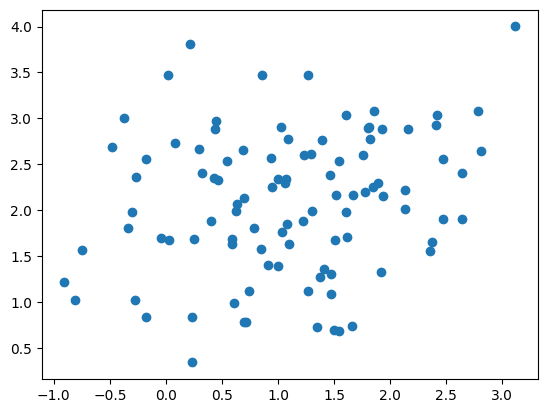

In [3]:
N = 100
# mean vector
mean = np.array([1., 2.])

# covariance matrix
cov = np.array([[1., 0.3], [0.3, 0.7]])

# sample data
X = np.random.multivariate_normal(mean, cov, N)

# draw plots of data
plt.scatter(X[:,0], X[:,1])

#### Gaussian kernel

$$k(x_i, x_j) = \exp(-\frac{1}{2\sigma^2}\|x_i - x_j\|^2)$$

In [4]:
def exp_kernel(x1, x2, sigma):
    dist_sq = np.sum(x1**2, axis=1).reshape(-1,1) \
    + np.sum(x2**2, axis=1).reshape(1,-1) \
    - 2 * np.dot(x1, x2.T)
    return np.exp(-0.5*dist_sq/sigma**2)

#### Sample random functions

$$(y(x_1), \ldots, y(x_N)) \sim N(0, K)$$
$$K\in \mathbb{R}^{N\times N}, K_{ij} = k(x_i, x_j)$$

#### $\sigma^2 = 1.0$

Text(0, 0.5, 'y')

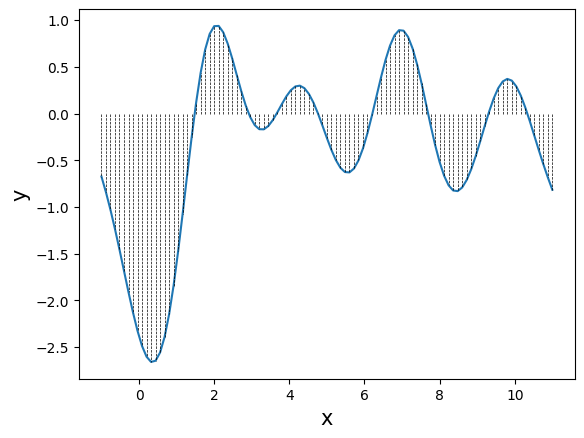

In [5]:
sigma = 1
x_query = np.linspace(-1,11,101)

# set mean from the zero mean function
mean_ftn = np.zeros(len(x_query))

# set covariance matrix from the covariance function
K = exp_kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)

y_sample = np.random.multivariate_normal(mean_ftn, K, 1)

plt.plot(x_query, y_sample[0])
for i, x in enumerate(x_query):
    plt.plot([x, x], [0, y_sample[0,i]], 'k--', linewidth=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

In [6]:
y_sample.shape

(1, 101)

Text(0, 0.5, 'y')

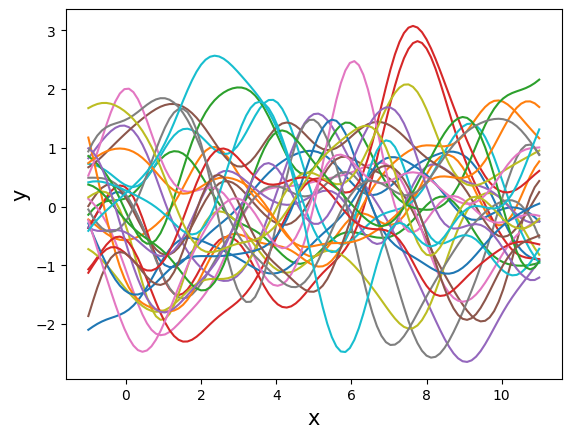

In [7]:
N_sample = 30
sigma = 1
x_query = np.linspace(-1,11,101)
K = exp_kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)
mean_ftn = np.zeros(len(x_query))
y_sample = np.random.multivariate_normal(mean_ftn, K, N_sample)
for i in range(N_sample):
    plt.plot(x_query, y_sample[i])
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

#### Gaussian Process Regression

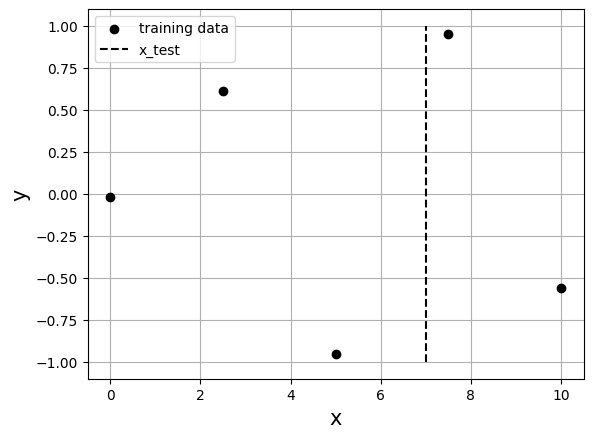

In [8]:
# data generation

x = np.linspace(0,10,5)
y = np.sin(x) + 0.01*np.random.randn(len(x))
x_test = 7

plt.scatter(x, y, c='k', zorder=5, label='training data')
plt.plot([x_test, x_test], [-1, 1], 'k--', label='x_test')
plt.legend()
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.grid()

$$p(y(x_1), \ldots, y(x_N), y(x)) = N(0, \Sigma)$$
$$\Sigma = \begin{bmatrix} K & k \\ k^\top & \kappa \end{bmatrix} \in \mathbb{R}^{(N+1) \times (N+1)}$$

$$k = (k(x, x_1), \ldots, k(x, x_N)) \in \mathbb{R}^N$$
$$K\in \mathbb{R}^{N\times N}, K_{ij} = k(x_i, x_j)$$
$$\kappa = k(x, x) \in \mathbb{R}$$

$$p(y(x)|y(x_1), \ldots, y(x_N)) = N(k^\top K^{-1} y, \kappa - k^\top K^{-1} k)$$
$$y = (y(x_1), \ldots, y(x_N)) \in \mathbb{R}^N$$

In [9]:
sigma = 1
K = exp_kernel(x[:,np.newaxis], x[:,np.newaxis], sigma)
k = exp_kernel(x[:,np.newaxis], np.array([[x_test]]), sigma)
kappa = exp_kernel(np.array([[x_test]]), np.array([[x_test]]), sigma)

y_pred = np.dot(k.T, np.linalg.solve(K, y[:,np.newaxis]))

In [10]:
K

array([[1.00000000e+00, 4.39369336e-02, 3.72665317e-06, 6.10193668e-13,
        1.92874985e-22],
       [4.39369336e-02, 1.00000000e+00, 4.39369336e-02, 3.72665317e-06,
        6.10193668e-13],
       [3.72665317e-06, 4.39369336e-02, 1.00000000e+00, 4.39369336e-02,
        3.72665317e-06],
       [6.10193668e-13, 3.72665317e-06, 4.39369336e-02, 1.00000000e+00,
        4.39369336e-02],
       [1.92874985e-22, 6.10193668e-13, 3.72665317e-06, 4.39369336e-02,
        1.00000000e+00]])

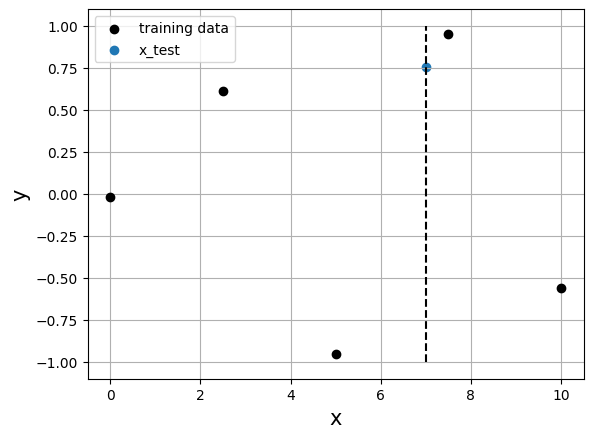

In [11]:
plt.scatter(x, y, c='k', zorder=5, label='training data')
plt.plot([x_test, x_test], [-1, 1], 'k--')
plt.scatter(x_test, y_pred, label='x_test')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.legend()
plt.grid()

In [12]:
def GPregression(x, y, sigma, x_query, kernel):
    K = kernel(x[:,np.newaxis], x[:,np.newaxis], sigma)
    k = kernel(x[:,np.newaxis], x_query[:,np.newaxis], sigma)
    kappa = kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)
    K_inv = np.linalg.inv(K)
    mean = np.dot(k.T, np.dot(K_inv, y[:,np.newaxis]))
    cov = kappa - np.dot(np.dot(k.T, K_inv), k)
    return mean, cov

Text(0, 0.5, 'y')

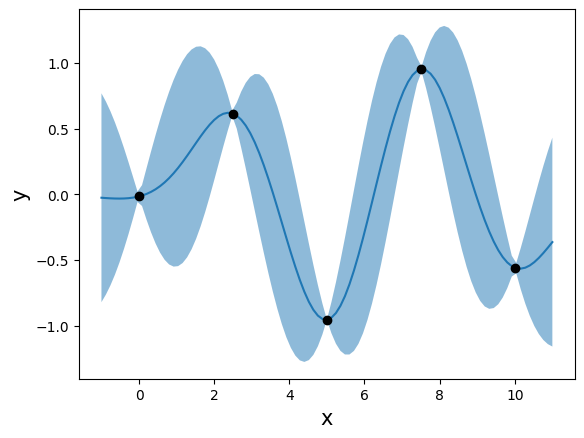

In [13]:
x_query = np.linspace(-1,11,101)
mean_ftn, cov_ftn = GPregression(x, y, sigma, x_query, exp_kernel)
std = np.sqrt(np.diag(cov_ftn))
plt.scatter(x, y, c='k', zorder=5)
plt.plot(x_query, mean_ftn)
plt.fill_between(x_query, mean_ftn.ravel() - std, mean_ftn.ravel() + std, alpha=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

#### Sample from conditional Gaussian

$$p(y(x_s)|y(x_1), \ldots, y(x_N)) = N(k_s^\top K^{-1} y, \kappa_s - k_s^\top K^{-1} k_s)$$
$$k_s = (k(x_s, x_1), \ldots, k(x_s, x_N)) \in \mathbb{R}^N$$
$$\kappa_s = k(x_s, x_s) \in \mathbb{R}$$

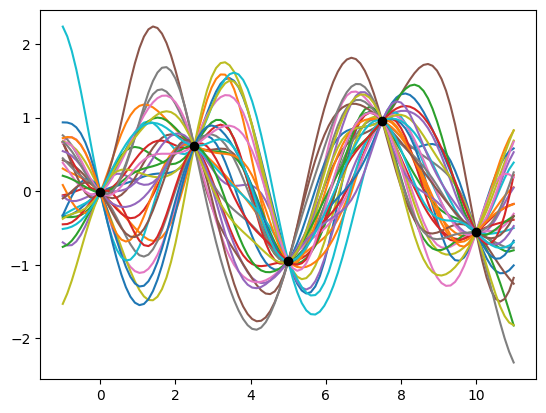

In [14]:
N_sample = 30

ys = np.random.multivariate_normal(mean_ftn.ravel(), cov_ftn, N_sample)

plt.figure()
for i in range(N_sample):
    plt.plot(x_query, ys[i])

plt.scatter(x, y, c='k', zorder=5)

#### Use different kernel parameter ($\sigma^2 = 0.3$)

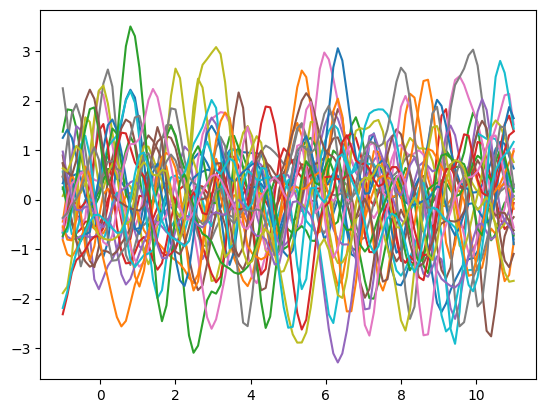

In [15]:
N_sample = 30
sigma = 0.3
x_query = np.linspace(-1,11,101)
K = exp_kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)
mean_ftn = np.zeros(len(x_query))
y_sample = np.random.multivariate_normal(mean_ftn, K, N_sample)
for i in range(N_sample):
    plt.plot(x_query, y_sample[i])

Text(0, 0.5, 'y')

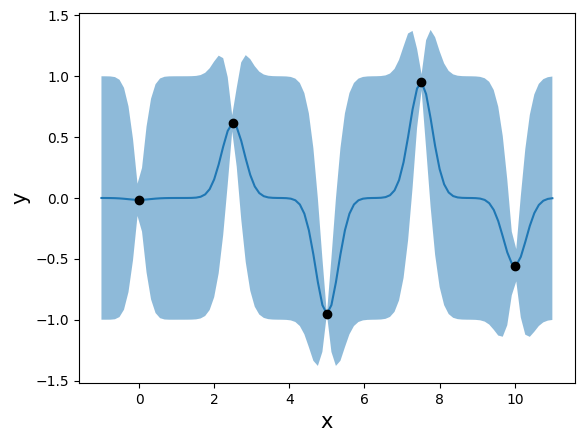

In [16]:
sigma = 0.3
x_query = np.linspace(-1,11,101)
mean_ftn, cov_ftn = GPregression(x, y, sigma, x_query, exp_kernel)
std = np.sqrt(np.diag(cov_ftn))
plt.scatter(x, y, c='k', zorder=5)
plt.plot(x_query, mean_ftn)
plt.fill_between(x_query, mean_ftn.ravel() - std, mean_ftn.ravel() + std, alpha=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

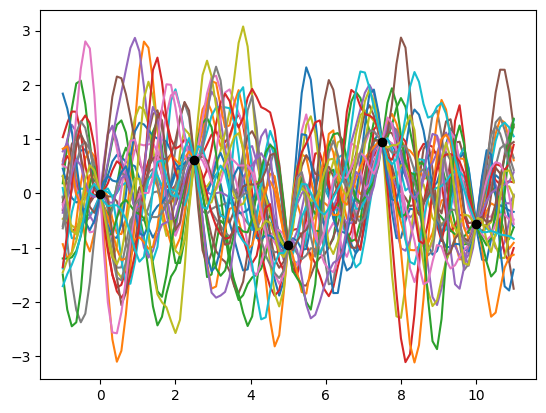

In [17]:
N_sample = 30

ys = np.random.multivariate_normal(mean_ftn.ravel(), cov_ftn, N_sample)

plt.figure()
for i in range(N_sample):
    plt.plot(x_query, ys[i])

plt.scatter(x, y, c='k', zorder=5)

#### Use different kernel (Laplacian kernel)

$$k(x_i, x_j) = \exp(-\frac{1}{\sigma^2}\|x_i - x_j\|)$$

In [18]:
def laplacian_kernel(x1, x2, sigma):
    dist = np.sqrt(np.sum(x1**2, axis=1).reshape(-1,1) \
    + np.sum(x2**2, axis=1).reshape(1,-1) \
    - 2 * np.dot(x1, x2.T))
    return np.exp(-dist/sigma**2)

#### $\sigma^2 = 1$

#### Sample random functions

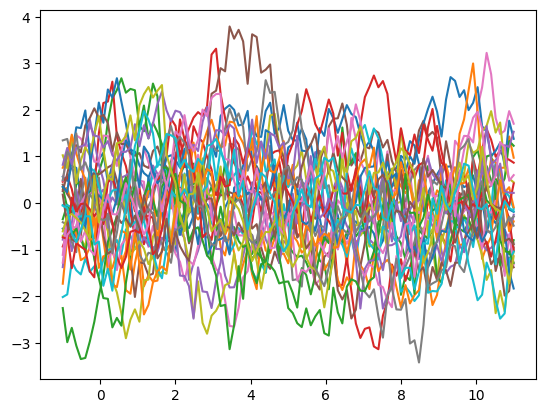

In [19]:
N_sample = 30
sigma = 1
x_query = np.linspace(-1,11,101)
K = laplacian_kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)
mean_ftn = np.zeros(len(x_query))
y_sample = np.random.multivariate_normal(mean_ftn, K, N_sample)
for i in range(N_sample):
    plt.plot(x_query, y_sample[i])

#### Gaussian process regression

Text(0, 0.5, 'y')

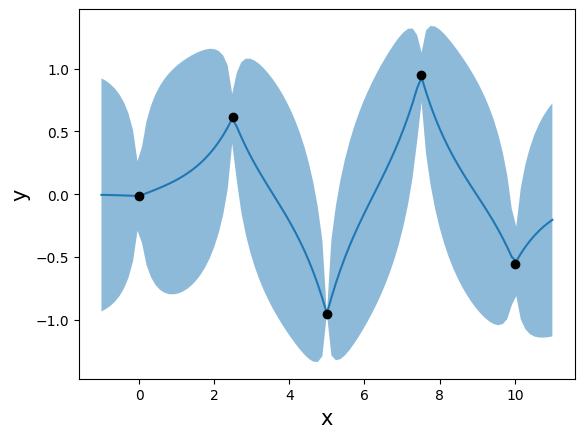

In [20]:
sigma = 1
x_query = np.linspace(-1,11,101)
mean_ftn, cov_ftn = GPregression(x, y, sigma, x_query, laplacian_kernel)
std = np.sqrt(np.diag(cov_ftn))
plt.scatter(x, y, c='k', zorder=5)
plt.plot(x_query, mean_ftn)
plt.fill_between(x_query, mean_ftn.ravel() - std, mean_ftn.ravel() + std, alpha=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

#### Sample from conditional Gaussian

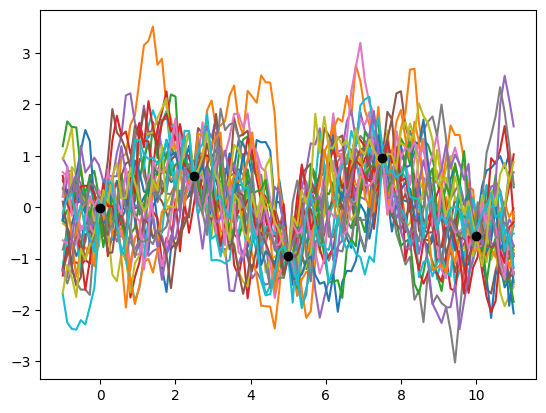

In [21]:
N_sample = 30

ys = np.random.multivariate_normal(mean_ftn.ravel(), cov_ftn, N_sample)

plt.figure()
for i in range(N_sample):
    plt.plot(x_query, ys[i])

plt.scatter(x, y, c='k', zorder=5)

#### $\sigma^2 = 0.5$

#### Sample random functions

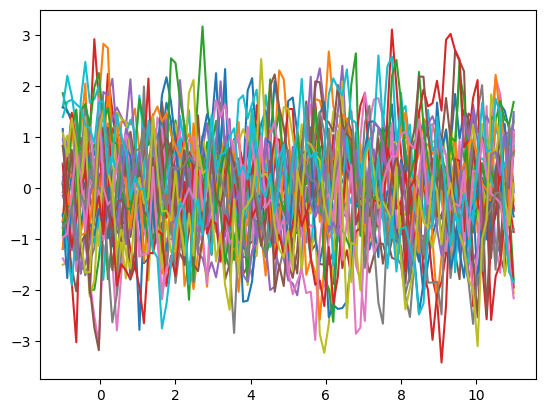

In [22]:
N_sample = 30
sigma = 0.5
x_query = np.linspace(-1,11,101)
K = laplacian_kernel(x_query[:,np.newaxis], x_query[:,np.newaxis], sigma)
mean_ftn = np.zeros(len(x_query))
y_sample = np.random.multivariate_normal(mean_ftn, K, N_sample)
for i in range(N_sample):
    plt.plot(x_query, y_sample[i])

#### Gaussian process regression

Text(0, 0.5, 'y')

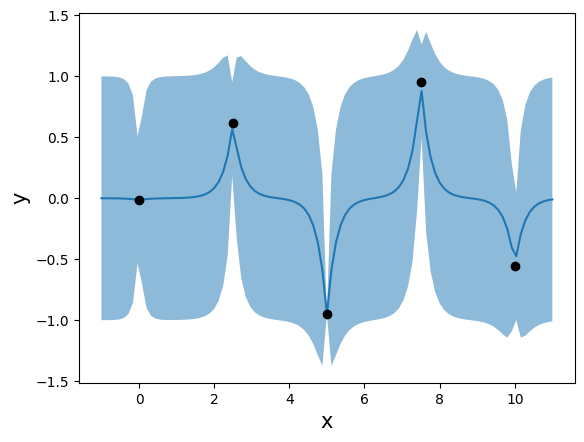

In [23]:
sigma = 0.5
x_query = np.linspace(-1,11,101)
mean_ftn, cov_ftn = GPregression(x, y, sigma, x_query, laplacian_kernel)
std = np.sqrt(np.diag(cov_ftn))
plt.scatter(x, y, c='k', zorder=5)
plt.plot(x_query, mean_ftn)
plt.fill_between(x_query, mean_ftn.ravel() - std, mean_ftn.ravel() + std, alpha=0.5)
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)

#### Sample from conditional Gaussian

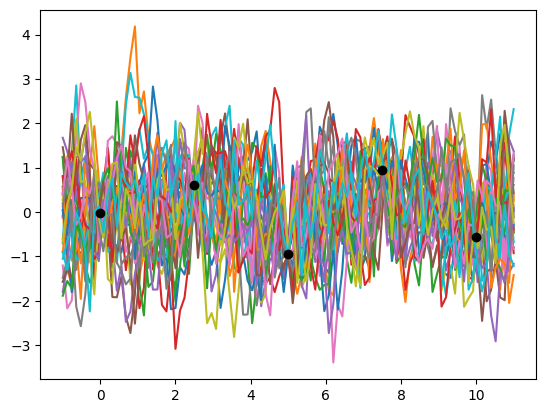

In [24]:
N_sample = 30

ys = np.random.multivariate_normal(mean_ftn.ravel(), cov_ftn, N_sample)

plt.figure()
for i in range(N_sample):
    plt.plot(x_query, ys[i])

plt.scatter(x, y, c='k', zorder=5)